<a href="https://colab.research.google.com/github/Vivek-afk81/NLP-101/blob/main/text_analytics_%26_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
try:
    from google.colab import drive
    drive.mount("/content/drive")
except ModuleNotFoundError:
    print(" Not running in Google Colab. Skipping drive mount.")


Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/My Drive/nlp/data")

#Word Cloud Concepts

##Word Cloud

A **word cloud** is a visual representation of text data in which individual words are displayed with varying sizes. The size of each word typically reflects its frequency or importance within the given text. Words that appear more often are shown larger, while less frequent words appear smaller.

### Applications of Word Clouds

Word clouds are commonly used in:
- Text and sentiment analysis
- Survey and feedback analysis
- Educational data exploration
- Social media and marketing analysis
- Exploratory data analysis in data science projects

### How a Word Cloud Works

The process of creating a word cloud generally involves:
1. **Text collection** – Gathering text from sources such as documents, surveys, articles, or social media.
2. **Text preprocessing** – Removing punctuation, numbers, and common stop words (e.g., *and*, *the*, *is*).
3. **Frequency calculation** – Counting how often each word appears.
4. **Visualization** – Displaying the words visually, scaled according to their frequency or assigned weight.




In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

from collections import Counter

###Step 1:- Text Collection
####preparing data for the Wordcloud

In [5]:
from wordcloud import WordCloud,STOPWORDS

with open("Course-Descriptions.txt","r",encoding="utf-8") as f:
  file_data=f.read()

print("filedata sample",file_data[:200])

filedata sample In this practical, hands-on course, learn how to do data preparation, data munging, data visualization, and predictive analytics. 
PHP is the most popular server-side language used to build dynamic we


In [6]:
## Generate the wordcloud data
stopwords=set(STOPWORDS)
word_cloud=WordCloud(stopwords=stopwords,max_words=25, \
                     background_color="white").generate(file_data)

###Visualization
####displaying the WordCloud

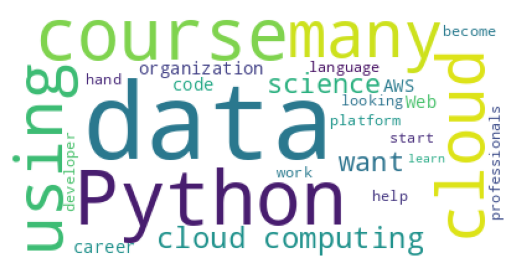

In [7]:
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

###Enhancing the WordCloud

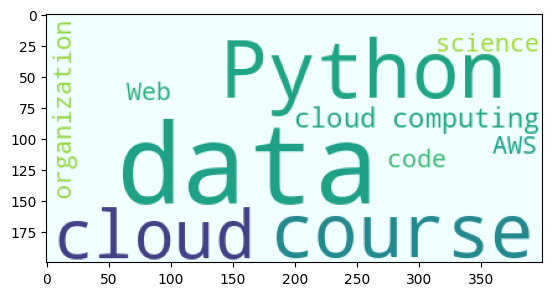

In [8]:
# Add more stopwords to ignore
stopwords.update(["many","using","want","value"])

#Redo stopwords limit number of words

word_cloud=WordCloud(stopwords=stopwords, max_words=10, \
                     background_color="azure").generate(file_data)

plt.imshow(word_cloud)

###Exploration

In [9]:
#Explore the word frequencies directly

words=file_data.lower().split()

word_freq=Counter(words)

word_freq.most_common(10)

[('to', 23),
 ('and', 21),
 ('the', 16),
 ('data', 12),
 ('of', 12),
 ('a', 11),
 ('you', 10),
 ('cloud', 9),
 ('in', 8),
 ('your', 8)]

### Limitations of Word Clouds

Word clouds rely primarily on word frequency and do not capture context, word relationships, or meaning. Important phrases may be split into individual words, and rare but meaningful terms may be overlooked.


## TF-IDF Based Word Cloud

A standard word cloud is based on raw word frequency, which means commonly occurring words tend to dominate the visualization. To address this limitation, a TF-IDF (Term Frequency–Inverse Document Frequency) approach can be used.

TF-IDF assigns higher importance to words that occur frequently in a document but less frequently across other documents. This helps highlight more distinctive and meaningful terms rather than generic ones.

Using TF-IDF in a word cloud allows the visualization to reflect word importance instead of simple frequency, making it more informative for text analysis.

In [10]:
#split text into smaller documents (lines)

documents=file_data.split("\n")

tf_idf=TfidfVectorizer(
    stop_words=list(stopwords),
    max_features=50
)


In [11]:
#Fit and transform the documents

tfidf_matrix= tf_idf.fit_transform(documents)

# Get feature names and their TF-IDF scores

features_names= tf_idf.get_feature_names_out()
tfidf_scores=tfidf_matrix.sum(axis=0).A1

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


In [12]:
# Convert to dictionary for WordCloud
tfidf_dict = dict(zip(features_names, tfidf_scores))

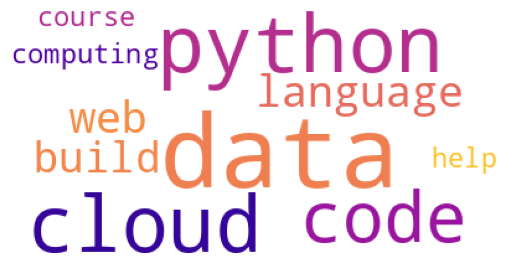

In [13]:
#Generate TF-IDF based word cloud

tfidf_wordcloud = WordCloud(
    background_color="white",
    max_words=10,
    colormap="plasma"

).generate_from_frequencies(tfidf_dict)

plt.imshow(tfidf_wordcloud)
plt.axis("off")
plt.show()

**Note** : Compared to the frequency-based word cloud, the TF-IDF-based word cloud emphasizes more specific and distinctive terms. Commonly repeated words that appeared large earlier may now appear smaller or disappear entirely.

###comparison


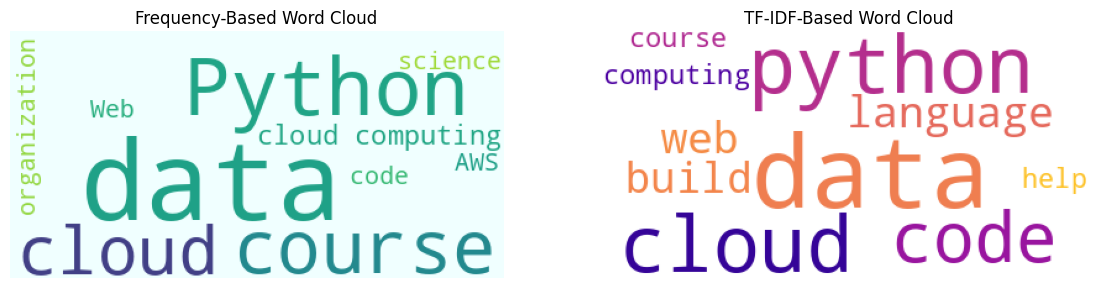

In [14]:
#Plotinf Side by Side
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(word_cloud)
plt.title("Frequency-Based Word Cloud")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(tfidf_wordcloud)
plt.title("TF-IDF-Based Word Cloud")
plt.axis("off")

plt.show()


#Sentiment Analysis Concepts

## Sentiment Analysis

Sentiment analysis is a natural language processing technique used to identify the emotional tone expressed in text. It classifies text as positive, negative, or neutral based on the words and phrases used.

Unlike word clouds, which focus on word importance or frequency, sentiment analysis focuses on understanding the overall opinion or attitude conveyed in the text.

## Understanding the Sentiment Scores

- **Polarity** ranges from -1 to +1  
  - -1 → very negative sentiment  
  - 0 → neutral sentiment  
  - +1 → very positive sentiment  

- **Subjectivity** ranges from 0 to 1  
  - 0 → very factual or objective  
  - 1 → very opinionated or subjective  

These scores provide a high-level view of the emotional tone present in the course descriptions.


In [43]:
import pandas as pd
from textblob import TextBlob

import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [15]:
#Import the movie reviews corpus
with open("Movie-Reviews.txt", 'r') as f:
  reviews = f.readlines()
print(reviews[:2])

['When your main character in a superhero movie is unwatchable, you already have a problem. In addition, Captain Marvel has no weaknesses, which kills the tension immediately.\n', 'Her performance was forced, uninspiring and flat! Not looking forward to the next movie with "her" in it....\n']


###Finding Sentiments by reviews

In [22]:
print("{:40}  :  {:10}:{:10}".format("Review","Polarity","Subjectivity"))

for review in reviews:
  #find sentiment of review
  sentiment=TextBlob(review)
  print('{:40}  :  {: 01.2f}  :  {:01.2f}'.format(review[:40],
                                                  sentiment.polarity,sentiment.subjectivity))

Review                                    :  Polarity  :Subjectivity
When your main character in a superhero   :   0.17  :  0.33
Her performance was forced, uninspiring   :  -0.11  :  0.11
I couldn't believe how boring this movie  :  -0.51  :  0.72
Nothing beats a good marvel movie, and t  :   0.70  :  0.60
This movie did for Marvel what Wonder Wo  :   0.60  :  0.68
Captain Marvel just became my favorite s  :   0.40  :  0.64
This is a very controversial Marvel film  :   0.36  :  0.62
Unfortunately, despite carrying many ele  :  -0.14  :  0.48
It's worth watching just for the fact th  :   0.30  :  0.10
It's great for a first time viewing. Wou  :   0.38  :  0.51


- TextBlob(review) analyzes the text and gives you sentiment metrics:
- sentiment.polarity → ranges from -1 (negative) to +1 (positive).
- sentiment.subjectivity → ranges from 0 (objective) to 1 (subjective).


In [28]:
#converting the result into a dataframe for better visualisation

results=[]

for review in reviews:
  sentiment=TextBlob(review)
  results.append({
      "Review":review,
      "Polarity":round(sentiment.polarity,2),
      "subjectivity":round(sentiment.subjectivity,2)
  })

  df=pd.DataFrame(results)
df

,Review,Polarity,subjectivity
0,When your main character in a superhero movie ...,0.17,0.33
1,"Her performance was forced, uninspiring and fl...",-0.11,0.11
2,I couldn't believe how boring this movie was. ...,-0.51,0.72
3,"Nothing beats a good marvel movie, and this is...",0.70,0.60
4,This movie did for Marvel what Wonder Woman di...,0.60,0.68
5,Captain Marvel just became my favorite superhe...,0.40,0.64
6,This is a very controversial Marvel film. Whic...,0.36,0.62
7,"Unfortunately, despite carrying many elements ...",-0.14,0.48
8,It's worth watching just for the fact that thi...,0.30,0.10
9,It's great for a first time viewing. Would you...,0.38,0.51


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Review        10 non-null     object 
 1   Polarity      10 non-null     float64
 2   subjectivity  10 non-null     float64
dtypes: float64(2), object(1)
memory usage: 372.0+ bytes


###Summarizing Sentiment


In [54]:
labels = ["Negative", "Neutral", "Positive"]
values = [0, 0, 0]

for review in reviews:
    words = review.split()

    # Business rule → too small to judge
    if len(words) < 4:
        values[1] += 1   # Neutral
        continue

    polarity = TextBlob(review).sentiment.polarity

    if polarity < 0:
        values[0] += 1   # Negative
    else:
        values[2] += 1   # Positive




In [55]:
sentiment_counts0 = dict(zip(labels, values))
sentiment_counts0


{'Negative': 3, 'Neutral': 0, 'Positive': 7}

###Visualiztion

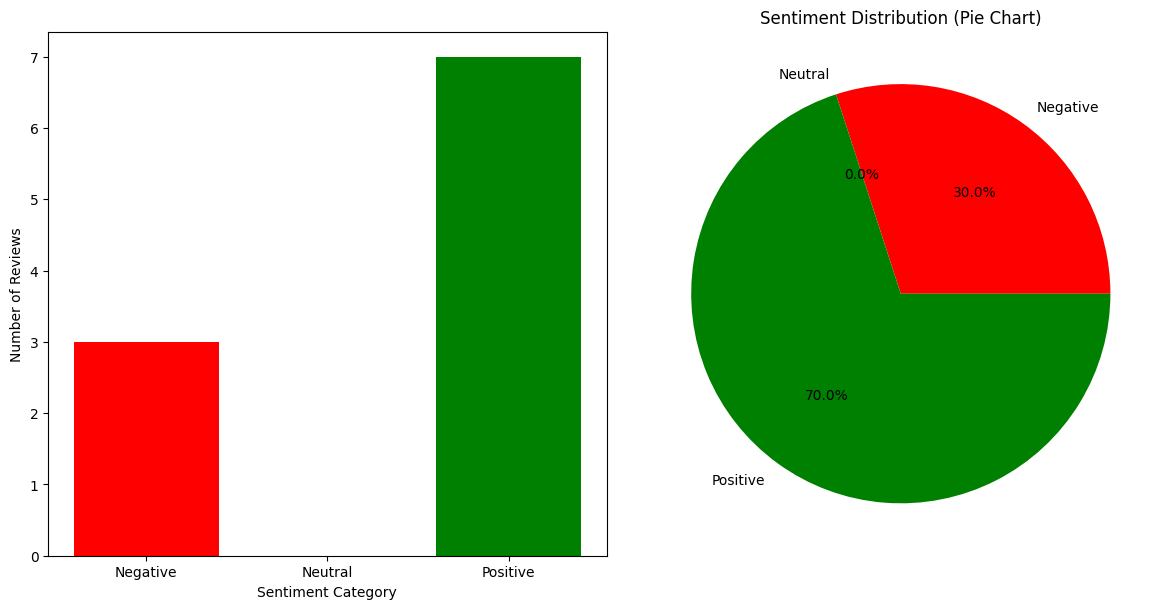

In [56]:
fig,axes=plt.subplots(1,2,figsize=(12,6))

#Bar Chart

axes[0].bar(labels, values, color=["red","gray","green"])
axes[0].set_xlabel("Sentiment Category")
axes[0].set_ylabel("Number of Reviews")


#pie chart

axes[1].pie(values, labels=labels, autopct='%1.1f%%', colors=["red","gray","green"])
axes[1].set_title("Sentiment Distribution (Pie Chart)")

plt.tight_layout()
plt.show()


###VADER Sentiment Analysis

VADER is ideal for short, descriptive text and works well out of the box.

In [60]:
# INitialize VADER

SIA=SentimentIntensityAnalyzer()

###Sentence-Level Sentiment Classification

We’ll classify each sentence as positive, neutral, or negative.

In [61]:
sentiment_labels = []

for sentence in reviews:
    if sentence.strip():
        score = SIA.polarity_scores(sentence)["compound"]

        if score >= 0.05:
            sentiment_labels.append("Positive")
        elif score <= -0.05:
            sentiment_labels.append("Negative")
        else:
            sentiment_labels.append("Neutral")

In [62]:
sentiment_counts = Counter(sentiment_labels)
sentiment_counts

Counter({'Negative': 5, 'Positive': 4, 'Neutral': 1})

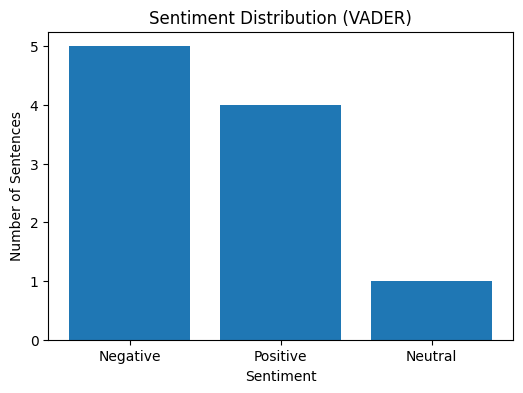

In [49]:
#Visualization

plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.keys(),sentiment_counts.values())
plt.title("Sentiment Distribution (VADER)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Sentences")
plt.show()

## Comparison of Threshold-Based and VADER Sentiment Results

The threshold-based approach using TextBlob classifies sentiment based on a single polarity score and lacks a neutral range, which causes mildly positive or mixed statements to be labeled as positive. As a result, the majority of reviews were classified as positive.

In contrast, VADER applies intensity-aware scoring and explicit neutral thresholds. This led to some previously positive reviews being reclassified as negative or neutral, increasing the number of negative and neutral sentiments while reducing positive ones.

This demonstrates how different sentiment models and decision thresholds can significantly affect sentiment distribution.
